## Practical examples

This is the moment where you really learn.

Take the model we created as a basis and try to improve it.

One of the biggest changes will be observed when you include the 'Model' feature we dropped in the beginning.

Here are some other suggestions:

-> Perform feature selection

-> Create a regression where 'Price' is not transformed

-> Deal with the outliers in a different way

=> **Decided to take: 'Model', maybe some feature selection, and outliers**

## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Loading the raw data

In [3]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing the data

### Exploring the descriptive statistics of the variables (or EDA = Explore Data Analysis)

In [4]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include = 'all')
# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [5]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
# since the missing values account for less than 5% of the data, let's just simply drop those data (rows)
data_no_missing_values = raw_data.dropna(axis=0) 

In [7]:
data_no_missing_values.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs (Probability Density Function (Hàm phân phối tích lũy))

C:\Users\tuanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

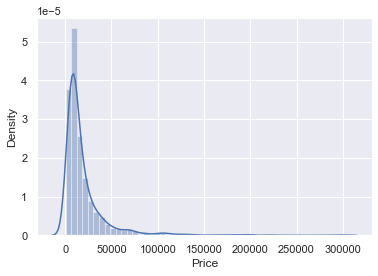

In [8]:
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_missing_values['Price'])

### Deal with outliers

In [11]:
# Let's declare a variable that will be equal to the 99.5th percentile of the 'Price' variable
q = data_no_missing_values['Price'].quantile(0.995)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_missing_values[data_no_missing_values['Price'] < q] # returns array[condition] with condition satisfied
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4004,4004.000000,4004,4004.000000,4004.000000,4004,4004,4004.000000,4004
unique,7,NaN,6,NaN,NaN,4,2,NaN,304
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1531,NaN,NaN,1859,3633,NaN,188
mean,NaN,18486.603137,NaN,164.366134,2.751189,NaN,NaN,2006.336164,NaN
std,NaN,21061.726772,NaN,103.072590,4.945153,NaN,NaN,6.684599,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\tuanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

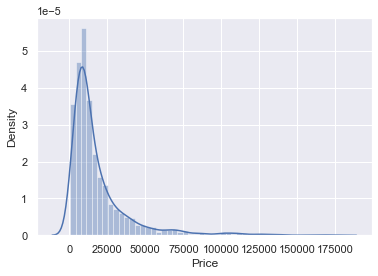

In [12]:
sns.distplot(data_1['Price'])

C:\Users\tuanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

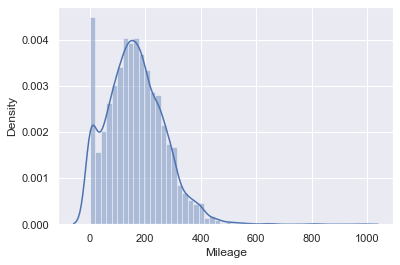

In [13]:
sns.distplot(data_1['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.995)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3983,3983.000000,3983,3983.000000,3983.000000,3983,3983,3983.000000,3983
unique,7,NaN,6,NaN,NaN,4,2,NaN,304
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,872,NaN,1525,NaN,NaN,1842,3612,NaN,187
mean,NaN,18523.740638,NaN,162.138589,2.753342,NaN,NaN,2006.374090,NaN
std,NaN,21078.643499,NaN,98.224593,4.957848,NaN,NaN,6.661256,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.500000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\tuanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

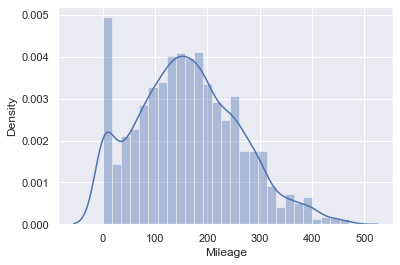

In [17]:
sns.distplot(data_2['Mileage']) # sns displot -> plot an array of numeric values

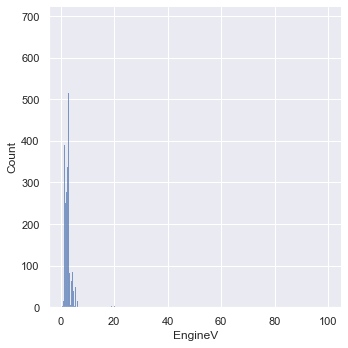

In [18]:
sns.displot(data_2['EngineV'])

In [22]:
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3960,3960.000000,3960,3960.000000,3960.000000,3960,3960,3960.000000,3960
unique,7,NaN,6,NaN,NaN,4,2,NaN,303
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1513,NaN,NaN,1835,3595,NaN,187
mean,NaN,18581.169939,NaN,161.940152,2.452255,NaN,NaN,2006.389899,NaN
std,NaN,21118.366238,NaN,98.278399,0.953782,NaN,NaN,6.661558,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21600.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


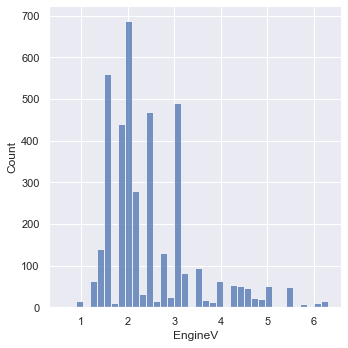

In [23]:
sns.displot(data_3['EngineV'])

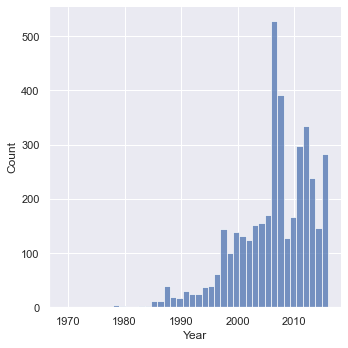

In [24]:
sns.displot(data_3['Year'])

In [26]:
q = data_3['Year'].quantile(0.005)
data_4 = data_3[data_3['Year'] > q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3933,3933.000000,3933,3933.000000,3933.000000,3933,3933,3933.000000,3933
unique,7,NaN,6,NaN,NaN,4,2,NaN,300
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,861,NaN,1495,NaN,NaN,1829,3568,NaN,183
mean,NaN,18680.884493,NaN,161.664124,2.454953,NaN,NaN,2006.555301,NaN
std,NaN,21149.749320,NaN,97.911055,0.955420,NaN,NaN,6.369937,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1986.000000,NaN
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21800.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\tuanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

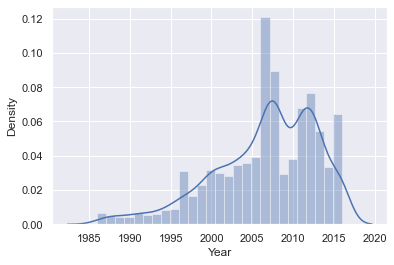

In [27]:
sns.distplot(data_4['Year'])

### Reset Index

In [28]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3933,3933.000000,3933,3933.000000,3933.000000,3933,3933,3933.000000,3933
unique,7,NaN,6,NaN,NaN,4,2,NaN,300
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,861,NaN,1495,NaN,NaN,1829,3568,NaN,183
mean,NaN,18680.884493,NaN,161.664124,2.454953,NaN,NaN,2006.555301,NaN
std,NaN,21149.749320,NaN,97.911055,0.955420,NaN,NaN,6.369937,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1986.000000,NaN
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21800.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Log Transformation

In [30]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
count,3933,3933,3933.000000,3933.000000,3933,3933,3933.000000,3933,3933.000000
unique,7,6,NaN,NaN,4,2,NaN,300,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,861,1495,NaN,NaN,1829,3568,NaN,183,NaN
mean,NaN,NaN,161.664124,2.454953,NaN,NaN,2006.555301,NaN,9.411741
std,NaN,NaN,97.911055,0.955420,NaN,NaN,6.369937,NaN,0.902005
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1986.000000,NaN,6.684612
25%,NaN,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN,8.853665
50%,NaN,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN,9.350102
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN,9.989665


### Multicollinearity

In [31]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns.values
vif

,VIF,Features
0,3.699495,Mileage
1,10.361677,Year
2,7.604919,EngineV


In [36]:
# Since vif of Year feature is bigger than 10 -> it's unacceptable so we should drop it
#data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)
data_no_multicollinearity = data_cleaned # use this run only, the next time run the line above
data_no_multicollinearity.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
count,3933,3933,3933.000000,3933.000000,3933,3933,3933,3933.000000
unique,7,6,NaN,NaN,4,2,300,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,861,1495,NaN,NaN,1829,3568,183,NaN
mean,NaN,NaN,161.664124,2.454953,NaN,NaN,NaN,9.411741
std,NaN,NaN,97.911055,0.955420,NaN,NaN,NaN,0.902005
min,NaN,NaN,0.000000,0.600000,NaN,NaN,NaN,6.684612
25%,NaN,NaN,90.000000,1.800000,NaN,NaN,NaN,8.853665
50%,NaN,NaN,158.000000,2.200000,NaN,NaN,NaN,9.350102
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,NaN,9.989665


### Create dummy variables

In [38]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit

In [39]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_324',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5', 'Model_5 Series', 'Model_5 Series GT', 'Model_520',
       'Model_523', 'Model_524', 'Model_525', 'Model_528', 'Model_530',
       'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640',

In [40]:
cols=['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_324',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5', 'Model_5 Series', 'Model_5 Series GT', 'Model_520',
       'Model_523', 'Model_524', 'Model_525', 'Model_528', 'Model_530',
       'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_GLS 500', 'Model_GLS 63',
       'Model_Galant', 'Model_Golf GTI', 'Model_Golf II',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Mark II', 'Model_Master', 'Model_Matrix',
       'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B2', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 140', 'Model_S 250',
       'Model_S 300', 'Model_S 320', 'Model_S 350', 'Model_S 400',
       'Model_S 420', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter', 'Model_Sprinter 208', 'Model_Sprinter 210',
       'Model_Sprinter 211', 'Model_Sprinter 212', 'Model_Sprinter 213',
       'Model_Sprinter 311', 'Model_Sprinter 312', 'Model_Sprinter 313',
       'Model_Sprinter 315', 'Model_Sprinter 316', 'Model_Sprinter 318',
       'Model_Sprinter 319', 'Model_Symbol', 'Model_Syncro',
       'Model_T3 (Transporter)', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_V 250', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']

In [41]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression Model

In [42]:
# declare target, inputs
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [44]:
input_scaled = scaler.transform(inputs)

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, target, test_size=0.2, random_state=42)

### Create the regression

In [48]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

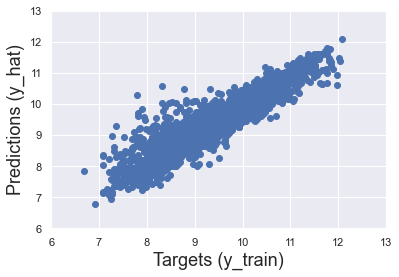

In [49]:
y_hat = reg.predict(x_train)
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\tuanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

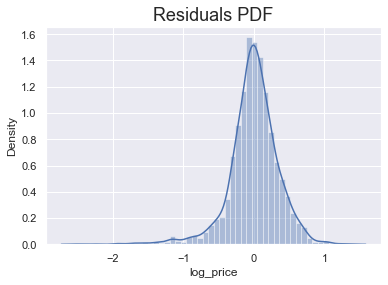

In [50]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [52]:
# Find the R-squared of the model
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print(reg.score(x_train,y_train))
print(adj_r2(x_train, y_train))
# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.846660650829732
0.829532607585545


### Finding the weights and bias

In [53]:
reg.intercept_

242395974927.33972

In [54]:
reg.coef_

array([-3.79254352e-01,  2.68110273e-02, -8.20565935e+11, -8.90495554e+11,
       -2.17739653e+12, -4.33283448e+12,  1.75555602e+12, -3.61354537e+12,
       -6.77279131e-02, -9.64355469e-03, -8.09326172e-02, -5.85937500e-02,
       -2.68554688e-02, -9.53369141e-02, -2.21557617e-02, -1.13220215e-01,
        3.19213867e-01, -3.52496608e+11,  1.34145058e+11, -8.66563019e+10,
       -1.00049347e+11, -5.00437681e+10,  1.89685635e+11, -1.22503733e+11,
       -1.00049347e+11,  1.34145058e+11, -7.07635755e+10, -7.07635755e+10,
       -8.66563019e+10,  2.32286957e+11, -5.00437681e+10, -5.00437681e+10,
       -1.22503733e+11, -2.68532684e+11, -3.78349443e+11, -5.00437681e+10,
       -5.00437681e+10, -1.32302307e+11, -1.32302307e+11, -1.49978499e+11,
        2.94020447e+12, -5.00437681e+10, -5.00437681e+10,  6.42281381e+12,
       -4.56133544e+12, -8.66563019e+10, -8.66563019e+10, -4.26477867e+11,
       -1.49978499e+11, -5.00437681e+10, -3.55104440e+11, -1.93473324e+11,
       -3.48161624e+11, -

In [58]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.792544e-01
1,EngineV,2.681103e-02
2,Brand_BMW,-8.205659e+11
3,Brand_Mercedes-Benz,-8.904956e+11
4,Brand_Mitsubishi,-2.177397e+12
...,...,...
311,Model_X6,-3.030076e+11
312,Model_X6 M,-1.000493e+11
313,Model_Yaris,-6.333395e+11
314,Model_Z3,-5.004377e+10


In [59]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

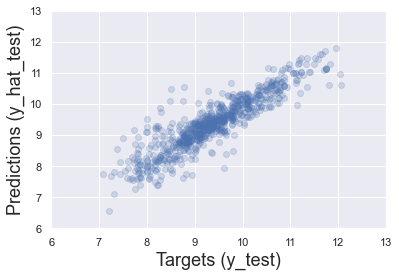

In [60]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [61]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

C:\Users\tuanb\AppData\Local\Temp\ipykernel_10532\2906630971.py:3: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,4864.036966
1,0.000000
2,15480.537476
3,11713.886220
4,24354.303967


In [62]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,4864.036966,NaN
1,0.000000,NaN
2,15480.537476,NaN
3,11713.886220,NaN
4,24354.303967,NaN
...,...,...
782,3450.803235,NaN
783,9479.248800,NaN
784,11386.798772,NaN
785,13849.587700,12000.0


In [63]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     8.455318
1     7.047517
2     9.975808
3     9.179881
4    10.106428
Name: log_price, dtype: float64

In [64]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,4864.036966,4700.0
1,0.000000,1150.0
2,15480.537476,21500.0
3,11713.886220,9700.0
4,24354.303967,24500.0
...,...,...
782,3450.803235,4500.0
783,9479.248800,14200.0
784,11386.798772,5999.0
785,13849.587700,14700.0


In [65]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [66]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4864.036966,4700.0,-164.036966,3.490148
1,0.000000,1150.0,1150.000000,100.000000
2,15480.537476,21500.0,6019.462524,27.997500
3,11713.886220,9700.0,-2013.886220,20.761714
4,24354.303967,24500.0,145.696033,0.594678
...,...,...,...,...
782,3450.803235,4500.0,1049.196765,23.315484
783,9479.248800,14200.0,4720.751200,33.244727
784,11386.798772,5999.0,-5387.798772,89.811615
785,13849.587700,14700.0,850.412300,5.785118


In [67]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,7.870000e+02,787.000000,7.870000e+02,787.000000
mean,inf,18631.040470,-inf,inf
std,NaN,22358.602536,NaN,NaN
min,0.000000e+00,1150.000000,-inf,0.049267
25%,6.879524e+03,6525.000000,-2.025302e+03,8.220519
50%,1.149293e+04,11403.990000,1.599156e+02,20.485009
75%,2.130983e+04,20900.000000,2.120601e+03,38.522918
max,inf,173333.000000,1.328646e+05,inf


In [68]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
495,11605.72,11600.00,-5.72,0.05
259,11492.93,11500.00,7.07,0.06
680,20912.87,20900.00,-12.87,0.06
105,25572.99,25555.00,-17.99,0.07
653,15018.91,14999.00,-19.91,0.13
670,14334.64,14300.00,-34.64,0.24
611,13535.37,13500.00,-35.37,0.26
509,13930.98,13893.75,-37.23,0.27
511,40885.48,41000.00,114.52,0.28
540,4513.90,4500.00,-13.90,0.31
